# 散裝貨運分析 

In [1]:
library(Formula)
library(plotrix)
library(TeachingDemos)
library(plotmo)
library(earth) #for 多變量適應性迴歸模型 (MARS)

library(FNN) # for Fast k-nearest neighbor searching

# 海岬型(capesize) -> 裕民、新興、中航

In [2]:
capesize <- read.csv("../data_files/capesize.csv")
capesize <- capesize[,-1]

In [3]:
# MLR
mlr.capesize <- lm(Bulk_capesize~., capesize)
cat("------------------------------summary------------------------------\n")
summary(mlr.capesize)

------------------------------summary------------------------------



Call:
lm(formula = Bulk_capesize ~ ., data = capesize)

Residuals:
     Min       1Q   Median       3Q      Max 
-8181858 -2573224  -286870  1967563 11932422 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -2353995.2 35158108.0  -0.067 0.946742    
BSI_t.1                             3941.3     6040.9   0.652 0.515510    
PPI_US                            102260.5   184244.9   0.555 0.580025    
BCI_t.1                             2326.6      661.6   3.517 0.000640 ***
BPI_t.1                             2578.9     2660.8   0.969 0.334584    
Australian.thermal.coal            67040.9    42589.5   1.574 0.118385    
Soybeans                          -21290.4    11826.5  -1.800 0.074616 .  
Wheat                              37148.1    21795.8   1.704 0.091188 .  
BHI_t.1                             1410.9    10413.1   0.135 0.892477    
WTI.crude.Oil                      69240.5    38143.8   1.815 0.072261 .  


In [4]:
# MARS
mars.capesize <- earth(Bulk_capesize~., degree =3, trace=2, capesize) # degree考慮交互項
cat("------------------------------summary------------------------------\n")
summary(mars.capesize)  ##ROE
cat("-------------------------evimp-------------------------\n")
evimp(mars.capesize, trim=FALSE)

x[125,16] with colnames BSI_t.1 PPI_US BCI_t.1 BPI_t.1 Australian.thermal.coal So...
y[125,1] with colname Bulk_capesize, and values 4.601e+07, 4.8e+07, 4.741e+07...
Forward pass: minspan 6 endspan 11   x[125,16] 15.6 kB   bx[125,33] 32.2 kB

         GRSq    RSq     DeltaRSq Pred     PredName         Cut  Terms   Par Deg
1      0.0000 0.0000                    (Intercept)
2      0.4068 0.4537       0.4537    1      BSI_t.1      1034.5  2   3         1 
4      0.4784 0.5591       0.1054    2       PPI_US       125.2  4   5         1 
6      0.5364 0.6418       0.0827    5 Australian.t       77.61  6   7         1 
8      0.5695 0.6972      0.05537   13 Breakbulk.ca       1.002  8   9         1 
10     0.5625 0.7211      0.02398    4      BPI_t.1      1365.5  10  11        1 
12     0.5519 0.7425      0.02133    7        Wheat      215.99  12  13    6   2 
14     0.5471 0.7667      0.02423    6     Soybeans      471.74  14  15    6   2 
16     0.5801 0.7957      0.02895    6     Soybean

Call: earth(formula=Bulk_capesize~., data=capesize, trace=2, degree=3)

                                                      coefficients
(Intercept)                                               51459411
h(125.2-PPI_US)                                            -901921
h(BPI_t.1-1365.5)                                            23116
h(Australian.thermal.coal-77.61)                           -928291
h(Corn-151.8)                                               -59759
h(1.00204-Breakbulk.capesize._SeasonIndex)              -137831441
h(BPI_t.1-1365.5) * Rock.Phosphate                            -155
h(125.2-PPI_US) * h(Rock.Phosphate-92.5)                     13234
h(3064-BCI_t.1) * h(203.43-Wheat)                              -58
h(Australian.thermal.coal-77.61) * h(Soybeans-471.74)       -18333
h(Australian.thermal.coal-77.61) * h(471.74-Soybeans)        11542
h(Australian.thermal.coal-77.61) * h(Soybeans-412.17)        19590
h(Australian.thermal.coal-77.61) * h(Wheat-215.99)       

-------------------------evimp-------------------------


                                nsubsets   gcv    rss
BPI_t.1                               11  68.2   72.6
BCI_t.1                               10 100.0> 100.0>
Wheat                                 10 100.0  100.0
Australian.thermal.coal               10  53.5   59.1
Soybeans                               8  55.9   57.7
Breakbulk.capesize._SeasonIndex        8  33.7   42.1
PPI_US                                 7  25.5   36.0
Corn                                   4  25.2   28.5
Rock.Phosphate                         3  18.8   22.7
BSI_t.1-unused                         0   0.0    0.0
BHI_t.1-unused                         0   0.0    0.0
WTI.crude.Oil-unused                   0   0.0    0.0
IMF_base.metal.index-unused            0   0.0    0.0
CN_metal.production-unused             0   0.0    0.0
Iron.Ore-unused                        0   0.0    0.0
PPI_CN-unused                          0   0.0    0.0

In [5]:
#KNN
knn.capesize <- knn.reg(capesize[,-1], capesize[,-1], capesize[,1], k=3, algorithm= "brute")

In [6]:
table1 = array(0, c(3,3))
rownames(table1) <- c("RMSE","MAE","MAPE")
colnames(table1) <- c("MLR","MARS","KNN")

#MLR
table1[1,1] <- sqrt(mean((capesize$Bulk_capesize - mlr.capesize$fitted.values)^2))
table1[2,1] <- mean(abs(capesize$Bulk_capesize - mlr.capesize$fitted.values))
table1[3,1] <- mean(abs((capesize$Bulk_capesize - mlr.capesize$fitted.values)/capesize$Bulk_capesize))

#MARS
table1[1,2] <- sqrt(mean((capesize$Bulk_capesize - mars.capesize$fitted.values)^2))
table1[2,2] <- mean(abs(capesize$Bulk_capesize - mars.capesize$fitted.values))
table1[3,2] <- mean(abs((capesize$Bulk_capesize - mars.capesize$fitted.values)/capesize$Bulk_capesize))

# KNN
table1[1,3] <- sqrt(mean((capesize$Bulk_capesize - knn.capesize$pred)^2))
table1[2,3] <- mean(abs(capesize$Bulk_capesize - knn.capesize$pred))
table1[3,3] <- mean(abs((capesize$Bulk_capesize - knn.capesize$pred)/capesize$Bulk_capesize))

table1

,MLR,MARS,KNN
RMSE,3.830416e+06,2.815660e+06,3.956058e+06
MAE,2.955167e+06,2.223353e+06,3.085200e+06
MAPE,6.301595e-02,4.845406e-02,6.825505e-02


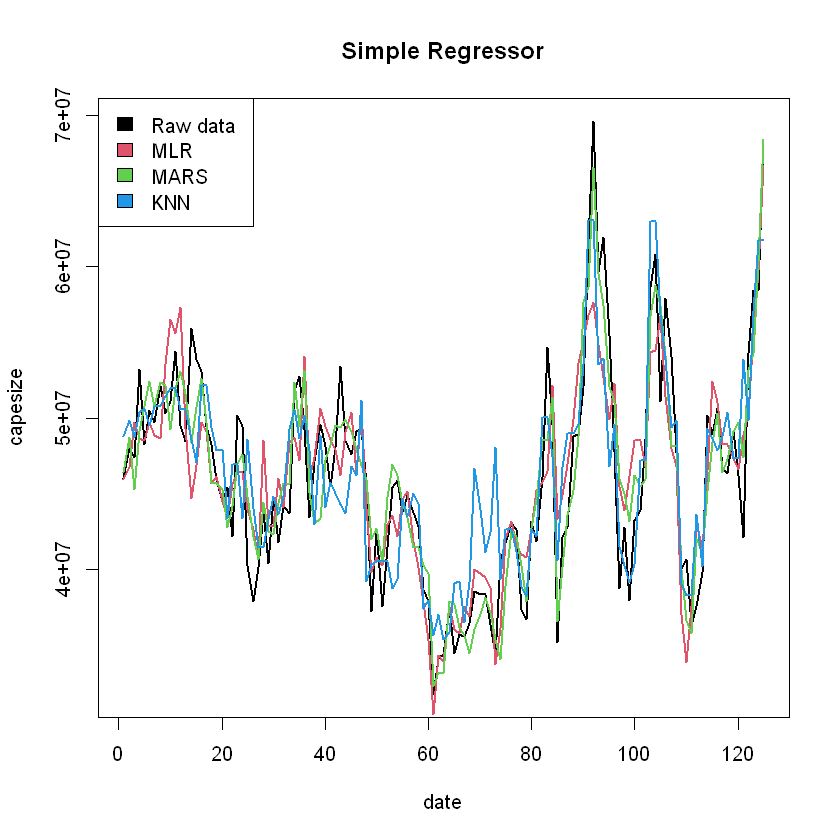

In [7]:
# 視覺化
plot(capesize[,1], type='l', col=1, lwd=2, ylab="capesize", xlab="date", main="Simple Regressor")
lines(mlr.capesize$fitted.values, col=2, lwd=2)
lines(mars.capesize$fitted.values, col=3, lwd=2)
lines(knn.capesize$pred, col=4, lwd=2)
legend("topleft", c("Raw data","MLR","MARS","KNN"), fill=1:4)

# 輕便型(handysize) -> 慧洋、四維、台航

In [8]:
handysize <- read.csv("../data_files/handysize.csv")
handysize <- handysize[,-1]

In [9]:
mlr.handysize <- lm(Handysize~., handysize)
summary(mlr.handysize)


Call:
lm(formula = Handysize ~ ., data = handysize)

Residuals:
      Min        1Q    Median        3Q       Max 
-10800597  -2147760    110231   1933132  11556235 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -2.777e+07  2.485e+07  -1.117  0.26639    
CN_metal.production      4.744e+03  7.083e+02   6.698 9.88e-10 ***
Australian.thermal.coal  9.644e+04  3.594e+04   2.683  0.00844 ** 
Rock.Phosphate           5.136e+04  2.585e+04   1.987  0.04947 *  
BPI                      3.491e+02  2.212e+03   0.158  0.87488    
BHI                      1.984e+04  8.842e+03   2.244  0.02689 *  
PPI_CN                  -5.670e+05  1.802e+05  -3.146  0.00214 ** 
PPI_US                   7.171e+05  1.517e+05   4.726 6.95e-06 ***
Iron.Ore                -1.123e+05  4.224e+04  -2.660  0.00900 ** 
Soybeans                 1.978e+04  1.003e+04   1.972  0.05114 .  
Corn                     1.508e+03  2.283e+04   0.066  0.94746    
IMF_base.metal

In [10]:
# select the optimal degree of MARS
min_mape <- 1
mape <- 0

for(i in 1:5) 
    {
     mars.handysize<-earth(handysize$Handysize~., degree = i, trace=2, data=handysize)
     mape=mean(abs((handysize$Handysize - mars.handysize$fitted.values))/handysize$Handysize)
  
     if(mape<min_mape)
         {
          min_mape=mape
          best_i=i
         }
    }
cat("\n\n\nThe best degree:",best_i)

x[125,16] with colnames CN_metal.production Australian.thermal.coal Rock.Phosphat...
y[125,1] with colname handysize$Handysize, and values 2.949e+07, 3.244e+07, 3.275e+...
Forward pass: minspan 6 endspan 11   x[125,16] 15.6 kB   bx[125,33] 32.2 kB

         GRSq    RSq     DeltaRSq Pred     PredName         Cut  Terms   Par Deg
1      0.0000 0.0000                    (Intercept)
2      0.5499 0.5785       0.5785    1 CN_metal.pro        9125  2   3         1 
4      0.6920 0.7304        0.152   13 WTI.crude.Oi       66.32  4   5         1 
6      0.7194 0.7711      0.04067    4          BPI        1816  6   7         1 
8      0.7961 0.8453      0.07423    2 Australian.t      111.56  8   9         1 
10     0.8402 0.8876      0.04227    6       PPI_CN       96.52  10  11        1 
12     0.8569 0.9069      0.01932    8     Iron.Ore      169.36  12  13        1 
14     0.8634 0.9181      0.01119   11 IMF_base.met      199.01  14  15        1 
16     0.8616 0.9238     0.005729    3 Rock.

In [11]:
# Use the best degree
mars.handysize <- earth(handysize$Handysize~., degree =3, trace=2, data=handysize)
cat("-----------------------------------summary-----------------------------------\n")
summary(mars.handysize)  ##ROE
cat("--------------------evimp--------------------\n")
evimp(mars.handysize, trim=FALSE)

x[125,16] with colnames CN_metal.production Australian.thermal.coal Rock.Phosphat...
y[125,1] with colname handysize$Handysize, and values 2.949e+07, 3.244e+07, 3.275e+...
Forward pass: minspan 6 endspan 11   x[125,16] 15.6 kB   bx[125,33] 32.2 kB

         GRSq    RSq     DeltaRSq Pred     PredName         Cut  Terms   Par Deg
1      0.0000 0.0000                    (Intercept)
2      0.5423 0.5785       0.5785    1 CN_metal.pro        9125  2   3         1 
4      0.6810 0.7304        0.152   13 WTI.crude.Oi       66.32  4   5         1 
6      0.7553 0.8109      0.08053    8     Iron.Ore      120.24  6   7     3   2 
8      0.8086 0.8653      0.05439    4          BPI        1816  8   9         1 
10     0.8293 0.8912      0.02585    2 Australian.t      111.56  10  11        1 
12     0.8700 0.9253      0.03413    6       PPI_CN        99.7  12  13    7   3 
14     0.8798 0.9381      0.01277    6       PPI_CN        98.8  14  15        1 
16     0.8771 0.9436     0.005504    4      

Call: earth(formula=handysize$Handysize~., data=handysize, trace=2, degree=3)

                                                                  coefficients
(Intercept)                                                           63305057
h(9125-CN_metal.production)                                              -4812
h(CN_metal.production-9125)                                              11982
h(111.56-Australian.thermal.coal)                                      -147859
h(98.8-PPI_CN)                                                        -1014522
h(PPI_CN-98.8)                                                         -335212
h(WTI.crude.Oil-66.32)                                                  629272
h(BPI-1816) * PPI_US                                                        93
h(9125-CN_metal.production) * h(Iron.Ore-120.24)                           -49
h(83.73-Australian.thermal.coal) * h(WTI.crude.Oil-66.32)                28774
h(Australian.thermal.coal-83.73) * h(WTI.crude.Oil-6

--------------------evimp--------------------


                        nsubsets   gcv    rss
CN_metal.production           18 100.0  100.0
Iron.Ore                      17  66.7   67.6
Australian.thermal.coal       16  62.7   62.6
BPI                           15  46.8   47.9
PPI_US                        15  46.8   47.9
PPI_CN                        14  32.5   35.7
WTI.crude.Oil                 13  26.9   30.8
IMF_base.metal.index           6  13.3   16.2
Rock.Phosphate-unused          0   0.0    0.0
BHI-unused                     0   0.0    0.0
Soybeans-unused                0   0.0    0.0
Corn-unused                    0   0.0    0.0
BCI-unused                     0   0.0    0.0
Wheat-unused                   0   0.0    0.0
BSI-unused                     0   0.0    0.0
Seasonindex-unused             0   0.0    0.0

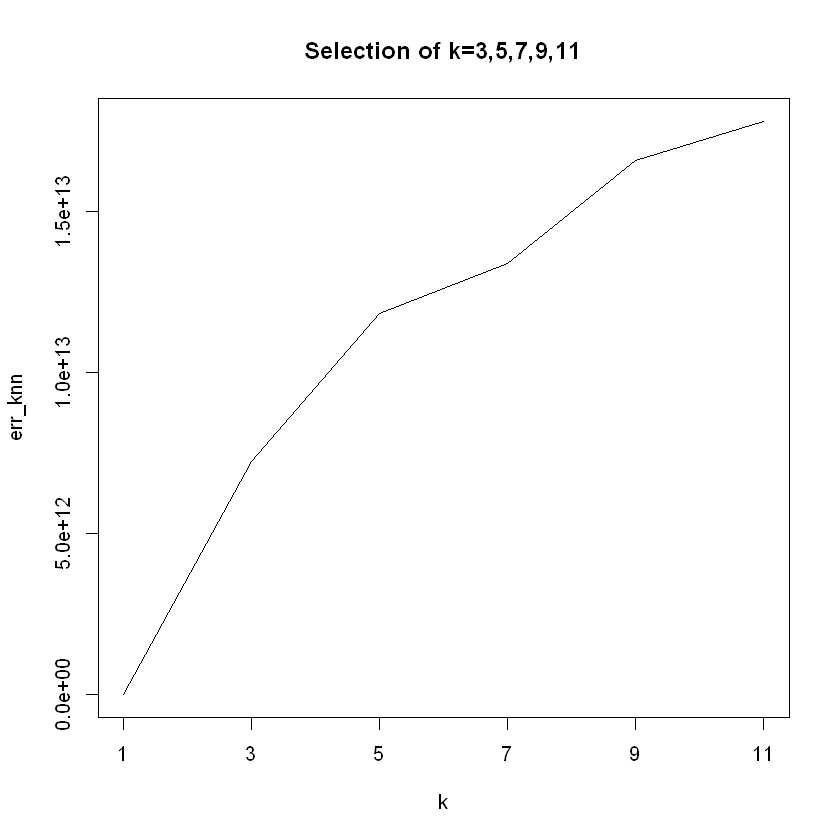

In [12]:
#select the optimal K for KNN
err_knn <- 1:5 
knn.k <- c(1,3,5,7,9,11)

for (i in 1:6)
{
  knn.handysize <- knn.reg(handysize[,-1], handysize[,-1], handysize[,1], k=2*i-1, algorithm= "brute")
  err_knn[i]= mean((handysize$Handysize - knn.handysize$pred)^2)
}
plot(knn.k, err_knn, type="l", xaxt="n", xlab="k", main="Selection of k=3,5,7,9,11")
axis(side=1, at=knn.k)

In [13]:
# 取k=5
knn.handysize <- knn.reg(handysize[,-1], handysize[,-1], handysize[,1], k=5, algorithm= "brute")

In [14]:
table2 = array(0, c(3,3))
rownames(table2) <- c("RMSE","MAE","MAPE")
colnames(table2) <- c("MLR","MARS","KNN")

table2[1,1] <- sqrt(mean((handysize$Handysize - mlr.handysize$fitted.values)^2))
table2[2,1] <- mean(abs(handysize$Handysize - mlr.handysize$fitted.values))
table2[3,1] <- mean(abs((handysize$Handysize - mlr.handysize$fitted.values)/handysize$Handysize))

table2[1,2] <- sqrt(mean((handysize$Handysize - mars.handysize$fitted.values)^2))
table2[2,2] <- mean(abs(handysize$Handysize - mars.handysize$fitted.values))
table2[3,2] <- mean(abs((handysize$Handysize - mars.handysize$fitted.values)/handysize$Handysize))

table2[1,3] <- sqrt(mean((handysize$Handysize - knn.handysize$pred)^2))
table2[2,3] <- mean(abs(handysize$Handysize - knn.handysize$pred))
table2[3,3] <- mean(abs((handysize$Handysize - knn.handysize$pred)/handysize$Handysize))

table2

,MLR,MARS,KNN
RMSE,3.208198e+06,1.585861e+06,3.441927e+06
MAE,2.469631e+06,1.194925e+06,2.525742e+06
MAPE,5.347246e-02,2.543850e-02,5.238378e-02


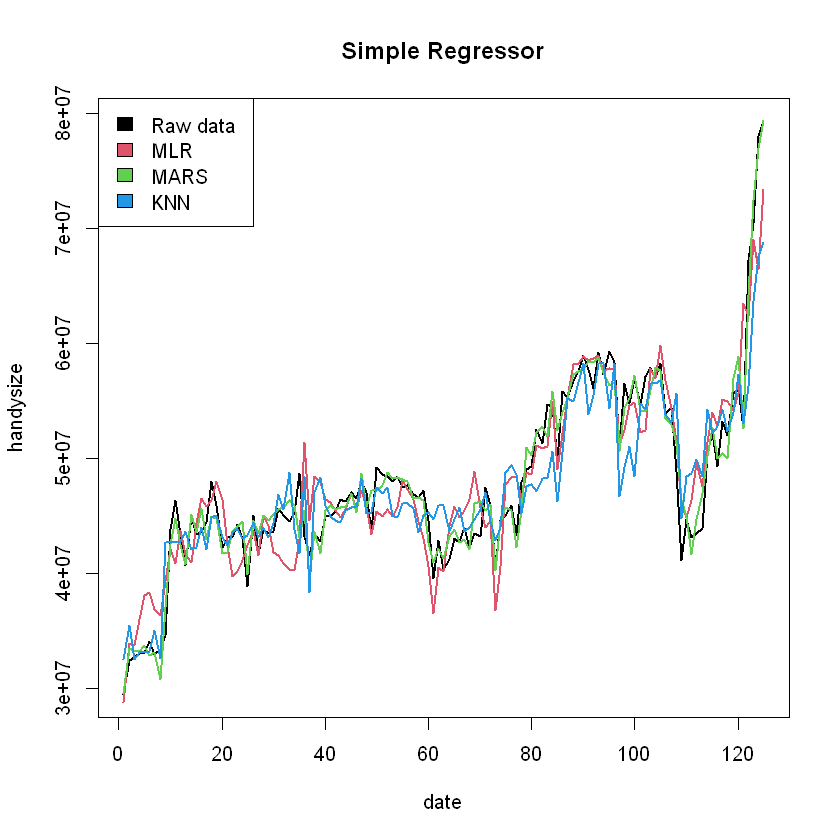

In [15]:
# 視覺化
plot(handysize[,1], type='l', col=1, lwd=2, ylab="handysize", xlab="date", main="Simple Regressor")
lines(mlr.handysize$fitted.values, col=2, lwd=2)
lines(mars.handysize$fitted.values, col=3, lwd=2)
lines(knn.handysize$pred, col=4, lwd=2)
legend("topleft", c("Raw data","MLR","MARS","KNN"), fill=1:4)